# Random Forests

Random Forests are a popular form of "ensembling" — the strategy of combining multiple different kinds of ML models to make a single decision. In ensembling in general any number of models might be combined, many different types of models might be used, and their votes might be weighted or unweighted. 

A Random Forest is a specific strategy for applying the concept of ensembling to a series of Decision Trees. Two techniques are used in order to ensure that each Decision Tree is different from the other trees in the forest:

1. Bagging (short for bootstrap aggregation), and
2. Random feature selection.

Bagging is a fancy term for sampling with replacement. For us, it means that for every underlying decision tree we randomly sample the items in our training data, with replacement, typically up to the size of the training data (but this is a hyperparameter you can change).

In a standard decision tree we consider EVERY feature and EVERY possible split point per feature. With random feature selection we instead specify a number of features to consider for split points when we first build the model. Every time we make a new split, we randomly select that number of features to consider. Among the selected features every split point will still be considered, and the optimum split will still be chosen, but the model will not have access to every possible feature at every possible split point.

These two changes generally make RF's a bit more robust than DT's. In particular an RF is less prone to overfitting than a DT. Conversely, DTs are generally faster to train and use, since you're only building one tree as opposed to many.

Anything that you can control via hyperparameters in a DT can be applied in an RF, as well as a few unique hyperparameters such as the number of trees to build.

In [1]:
# Lets look at the same examples from the DT lessons.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier

# Load the data
heart_dataset = pd.read_csv('../../datasets/uci-heart-disease/heart.csv')

# Split the data into input and labels
labels = heart_dataset['target']
input_data = heart_dataset.drop(columns=['target'])

# Split the data into training and test
training_data, test_data, training_labels, test_labels = train_test_split(
    input_data, 
    labels, 
    test_size=0.20
)

model = RandomForestClassifier()
model.fit(training_data, training_labels)
model.score(test_data, test_labels)

0.819672131147541

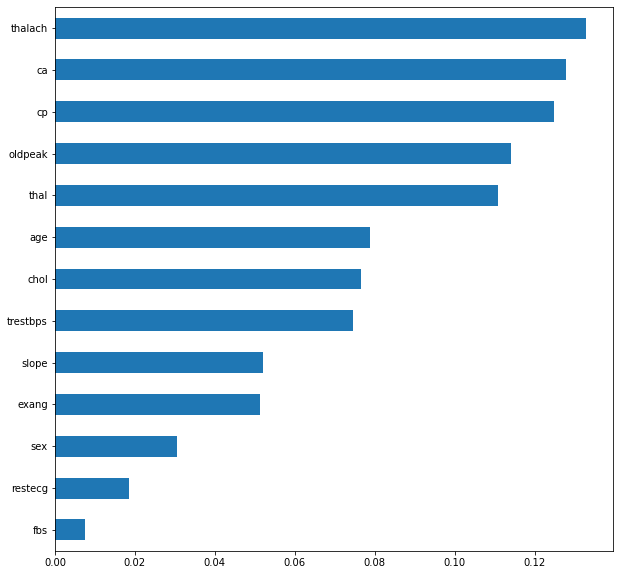

In [2]:
# We can still get the feature importances:
feat_importances = pd.Series(model.feature_importances_, index=training_data.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,10))

In [3]:
from sklearn.ensemble import RandomForestRegressor

# Load the data
fish_dataset = pd.read_csv('../../datasets/fish/Fish.csv')

# Split the data into input and labels — we're trying to predict fish weight based on 
# its size and species
labels = fish_dataset['Weight']
input_data = fish_dataset.drop(columns=['Weight'])

# We have one categorical parameter, so lets tell pandas to one-hot encode this value.
input_data = pd.get_dummies(input_data, columns=['Species'])

# Split the data into training and test
training_data, test_data, training_labels, test_labels = train_test_split(
    input_data, 
    labels, 
    test_size=0.20
)

model = RandomForestRegressor()
model.fit(training_data, training_labels)
model.score(test_data, test_labels)

0.9666181028213305

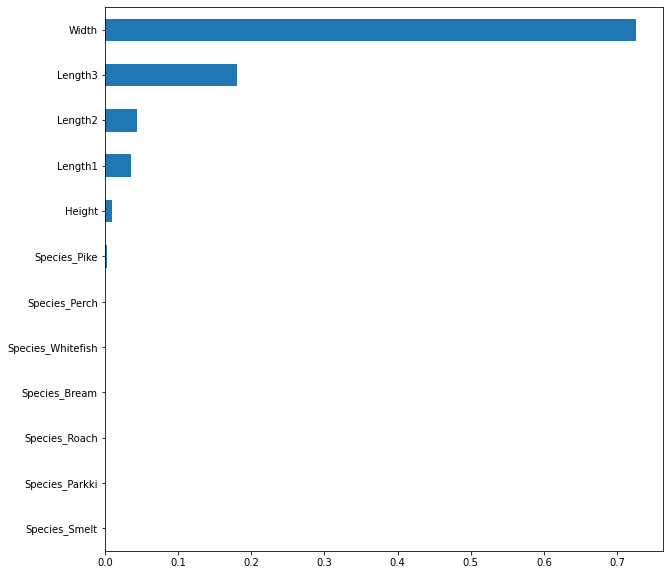

In [4]:
feat_importances = pd.Series(model.feature_importances_, index=training_data.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,10))